In [508]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as  plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape

In [524]:
input_df = pd.read_csv("../../data/csv_files/df_ph1.csv")

In [526]:
input_df.shape

(7748, 10)

In [528]:
stations_name = list(input_df.columns)
stations_name.remove("dt")

index_name = {}
for i, name in enumerate(stations_name):
    index_name[i] = name
index_name

{0: 'FEX_004',
 1: 'FSB_095DR',
 2: 'FSB_078',
 3: 'FSB_126',
 4: 'FSB_130D',
 5: 'FPZ_06A',
 6: 'FSB_079',
 7: 'FPZ_04A',
 8: 'FSB_097D'}

In [530]:
input_df = input_df.interpolate(method="linear")

In [532]:
input_df.isna().sum()

dt           0
FEX_004      0
FSB_095DR    0
FSB_078      0
FSB_126      0
FSB_130D     0
FPZ_06A      0
FSB_079      0
FPZ_04A      0
FSB_097D     0
dtype: int64

In [534]:
datetime = input_df['dt']
df = input_df[8:]
datetime = df['dt']
df = df.drop(columns = ['dt'])
df.shape

(7740, 9)

In [536]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [538]:
reshaped_arr = scaled_data.reshape((7740, 9, 1))

In [540]:
reshaped_arr.shape

(7740, 9, 1)

In [542]:
def create_4d_array(array, window_size, overlap):
    step = window_size - overlap
    num_rows, num_columns, depth = array.shape
    num_windows = (num_rows - window_size) // step + 1

    array_4d = np.zeros((num_windows, window_size, num_columns, depth))

    count = 0
    for i in range(0, num_windows, step):
        array_4d[count] = array[i:i+window_size]
        count += 1

    return array_4d

In [544]:
reshaped_arr[:2]

array([[[-1.6747338 ],
        [-1.23767251],
        [-1.16105804],
        [-1.74993132],
        [-1.85069759],
        [ 0.19003012],
        [-0.68354867],
        [-1.80684442],
        [-1.63730985]],

       [[-1.67508832],
        [-1.25466739],
        [-1.15332615],
        [-1.7482755 ],
        [-1.83956664],
        [ 0.18013931],
        [-0.6812337 ],
        [-1.80634196],
        [-1.63661088]]])

In [546]:
X_train = create_4d_array(reshaped_arr, 10, 6)

In [548]:
X_train.shape

(1933, 10, 9, 1)

In [550]:
model = Sequential([
    Conv2D(32, kernel_size=(3,1), activation='relu', input_shape=(10, 9, 1)),
    MaxPooling2D(pool_size=(2,1)),
    
    Conv2D(64, kernel_size=(3,1), activation='relu'),
    MaxPooling2D(pool_size=(2,1)),
    
    Flatten(),    
    Dense(64, activation='relu'),
    Dense(10 * 9 * 1 , activation='linear'),
    Reshape((10, 9, 1))
])

model.compile(optimizer='adam', loss='mean_squared_error') 

/Users/sandeshgnawali/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [552]:
model.fit(X_train, X_train, epochs = 100, batch_size = 64)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3018   
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0438
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 

In [553]:
X_test = create_4d_array(reshaped_arr, 10, 0)
X_test.shape

(774, 10, 9, 1)

In [554]:
y_pred = model.predict(X_test[0].reshape(1, 10,9,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [558]:
y_act = X_test[0]
y_pred = y_pred[0]

y_act.shape, y_pred.shape

((10, 9, 1), (10, 9, 1))

In [560]:
y_act[:, 0]

array([[-1.6747338 ],
       [-1.67508832],
       [-1.67797115],
       [-1.66428835],
       [-1.66545729],
       [-1.66697467],
       [-1.66251976],
       [-1.64511947],
       [-1.64587512],
       [-1.65075142]])

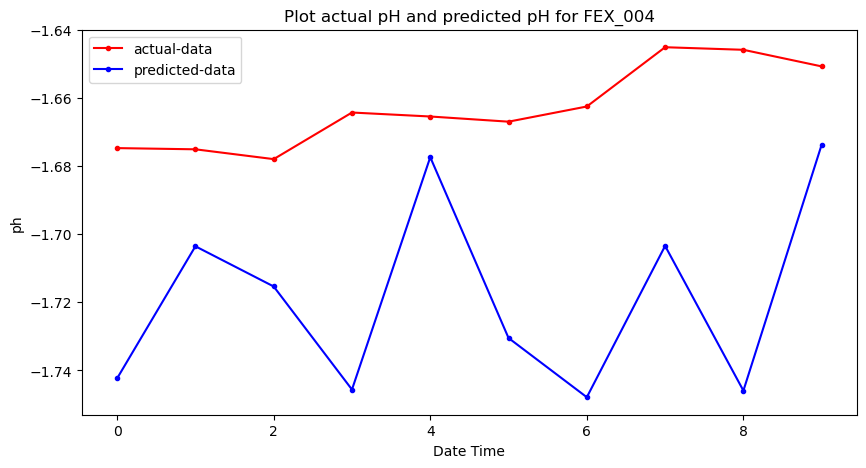

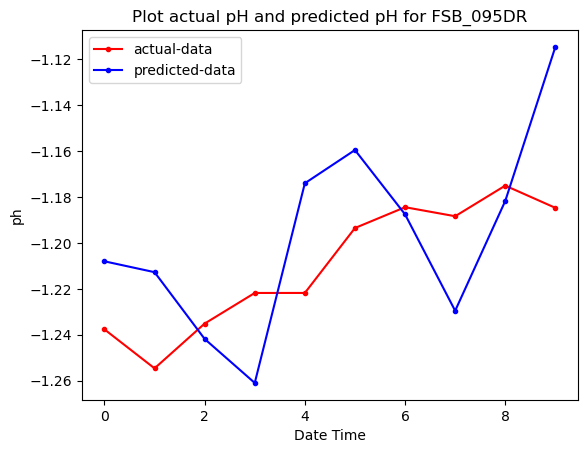

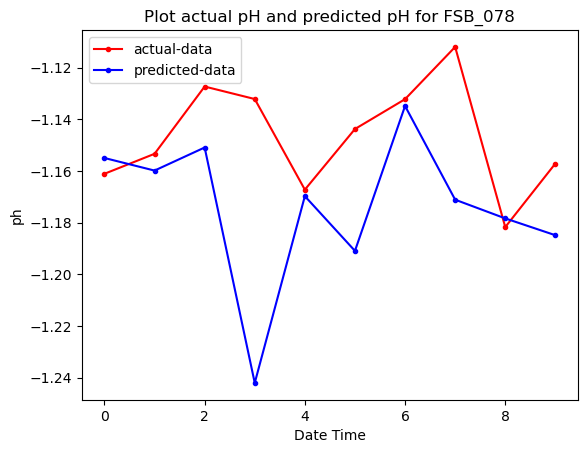

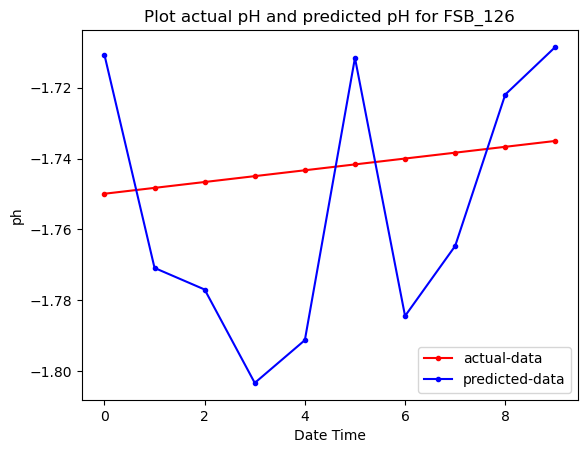

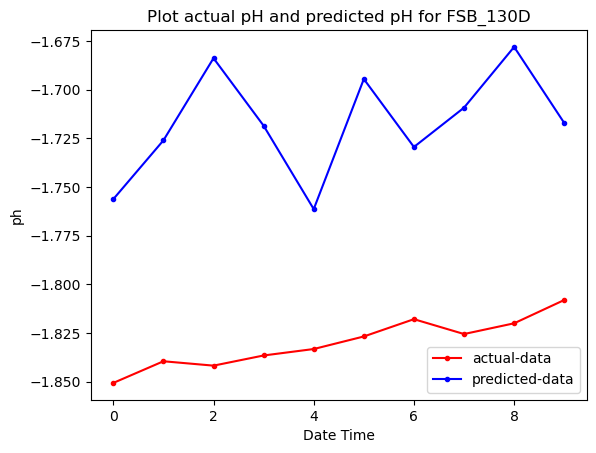

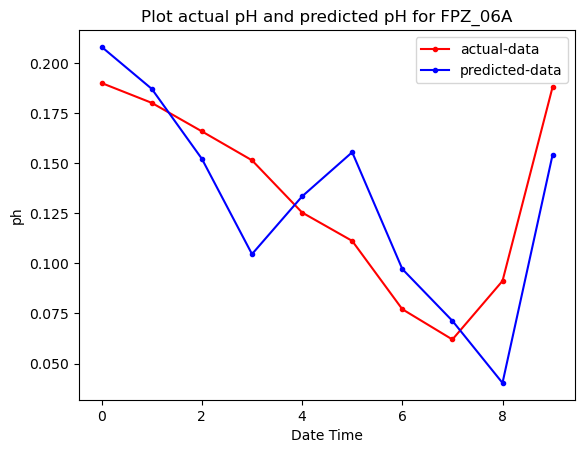

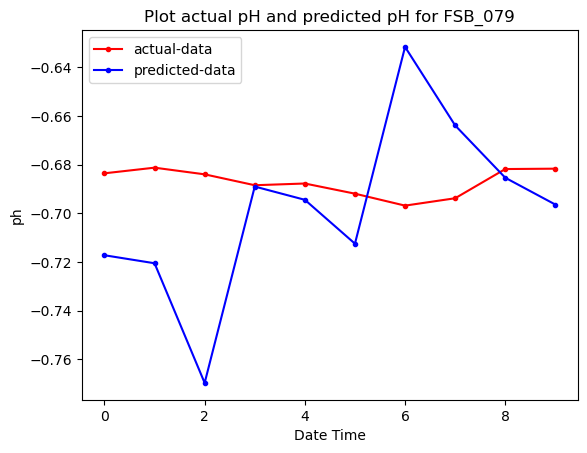

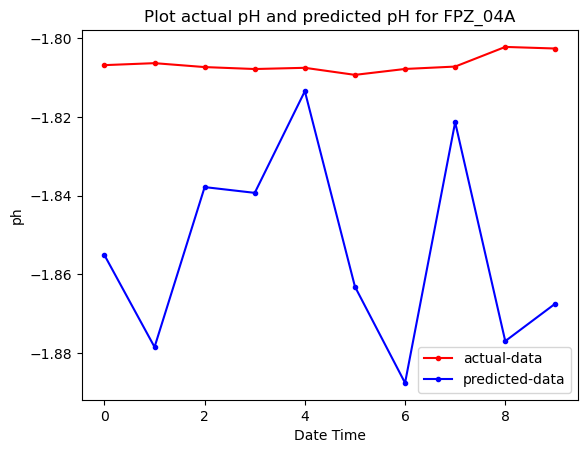

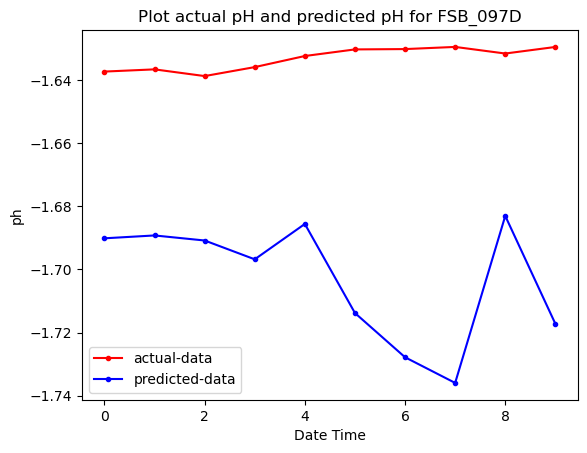

In [562]:
plt.figure(figsize=(10, 5))
for index in range(9):
    plt.plot(y_act[:, index], marker='.', color="red", label="actual-data")
    plt.plot(y_pred[:, index], marker='.', color="blue", label = "predicted-data")


    plt.xlabel('Date Time')
    plt.ylabel('ph')
    plt.title(f'Plot actual pH and predicted pH for {index_name[index]}')
    plt.legend()
    plt.show()

In [564]:
predicted_data = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step


In [566]:
predicted_data.shape

(774, 10, 9, 1)

In [568]:
predicted_data = predicted_data.reshape(-1,9)

In [570]:
predicted_data.shape

(7740, 9)

In [572]:
reversed_scaled_data = scaler.inverse_transform(predicted_data)
predicted_df = pd.DataFrame(reversed_scaled_data)
predicted_df.rename(columns = index_name, inplace= True)

In [574]:
df.head()

,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
8,3.982334,4.242422,4.174381,4.179986,4.132148,5.254261,7.717993,6.416275,3.767944
9,3.982292,4.241088,4.175074,4.180142,4.133276,5.252848,7.718636,6.416492,3.768030
10,3.981953,4.242620,4.177405,4.180298,4.133048,5.250815,7.717875,6.416061,3.767769
11,3.983563,4.243669,4.176972,4.180454,4.133577,5.248752,7.716632,6.415847,3.768118
12,3.983425,4.243669,4.173831,4.180611,4.133913,5.245027,7.716830,6.415980,3.768550


In [576]:
predicted_df.head()

,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,3.974379,4.244752,4.174929,4.183684,4.141716,5.256839,7.708649,6.395389,3.761457
1,3.978942,4.244380,4.174492,4.178010,4.144775,5.253844,7.707735,6.385280,3.761568
2,3.977553,4.242095,4.175292,4.177435,4.149053,5.248856,7.694089,6.402866,3.761372
3,3.973992,4.240589,4.167132,4.174949,4.145537,5.242061,7.716483,6.402232,3.760639
4,3.982020,4.247423,4.173606,4.176087,4.141197,5.246178,7.714971,6.413411,3.762016


In [582]:
datetime.shape, df.shape, predicted_df.shape

((7740,), (7740, 9), (7740, 9))

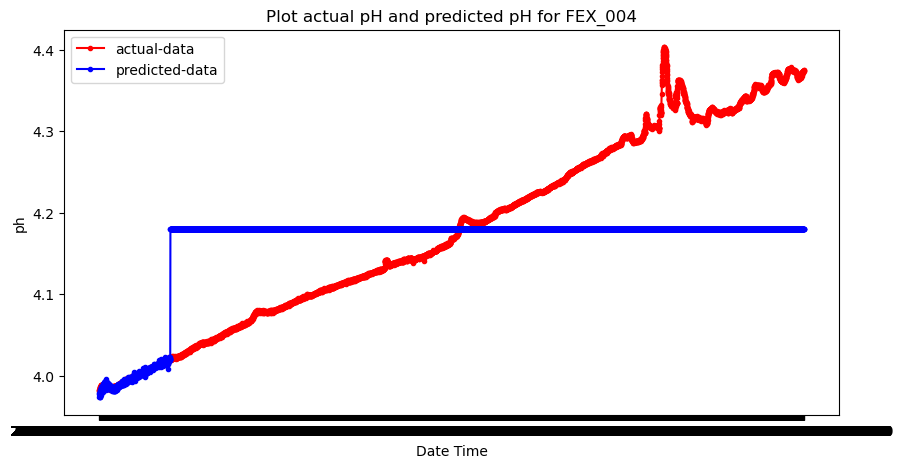

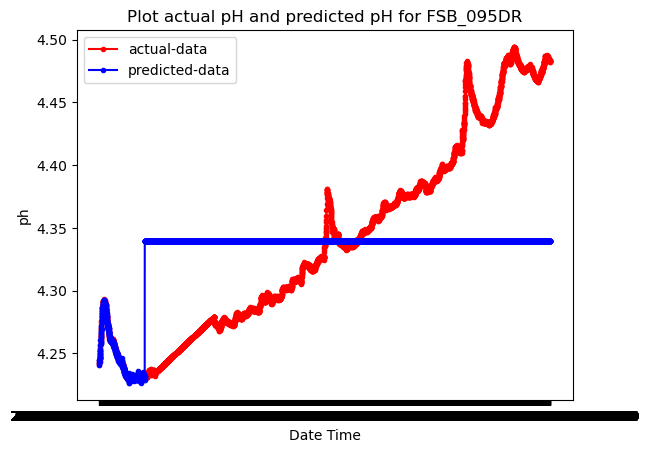

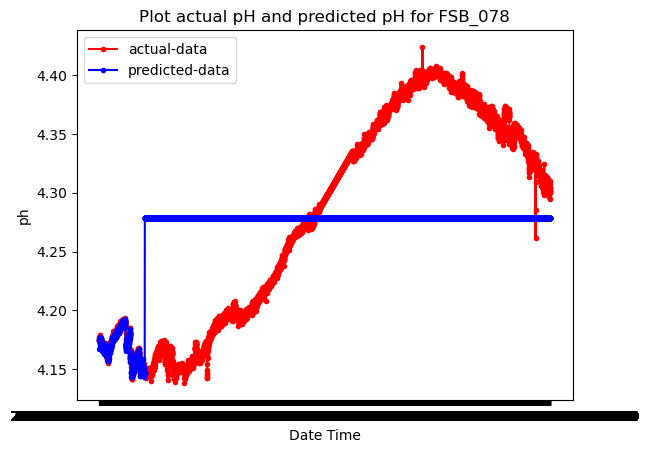

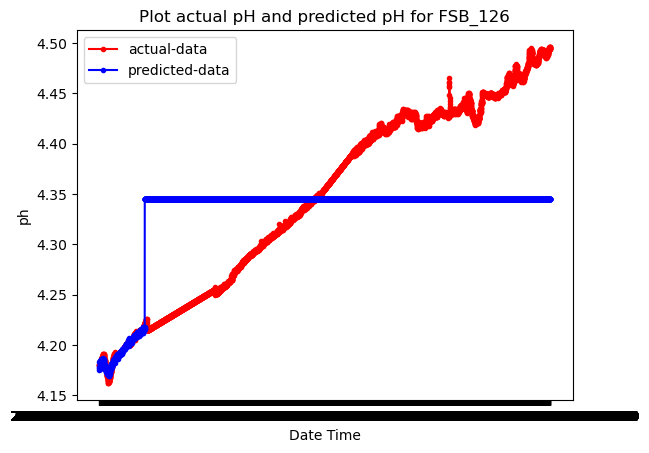

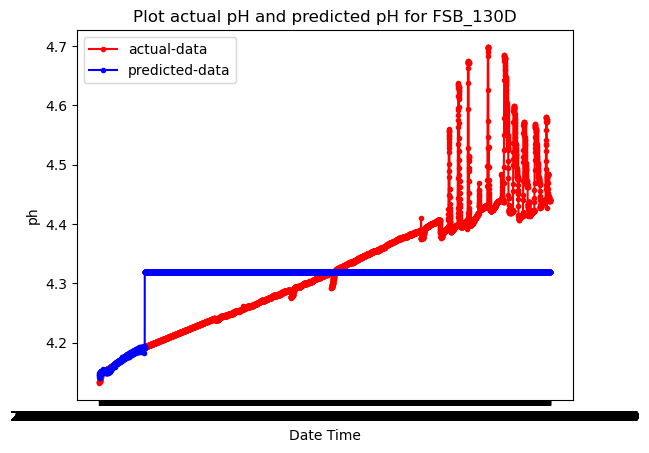

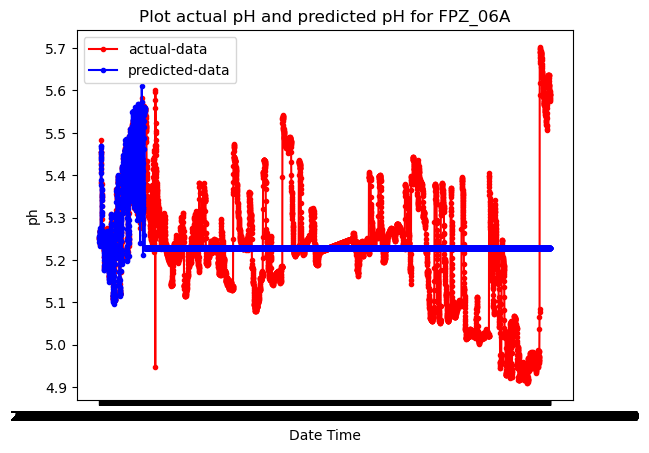

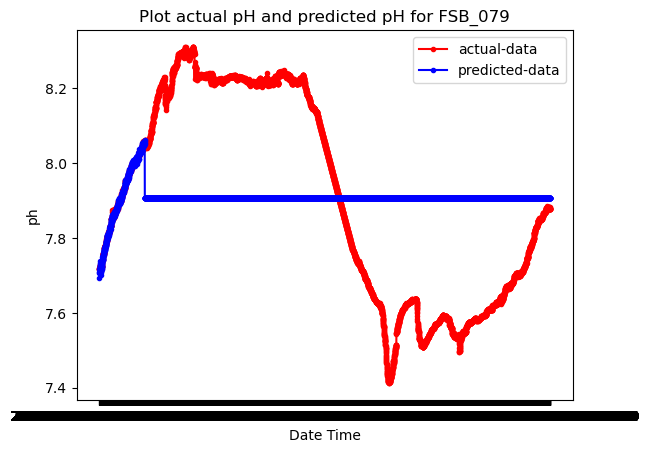

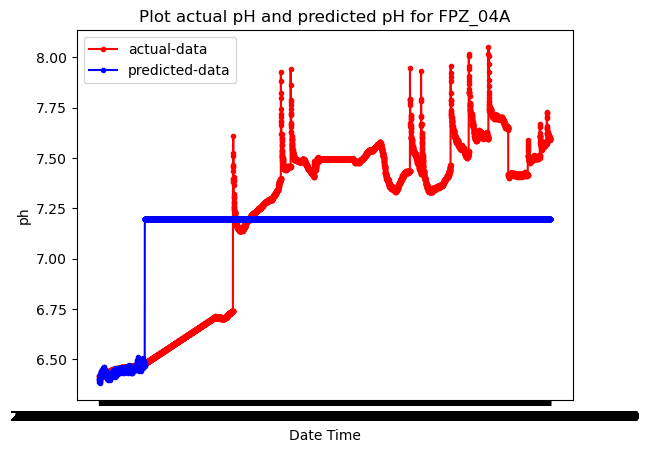

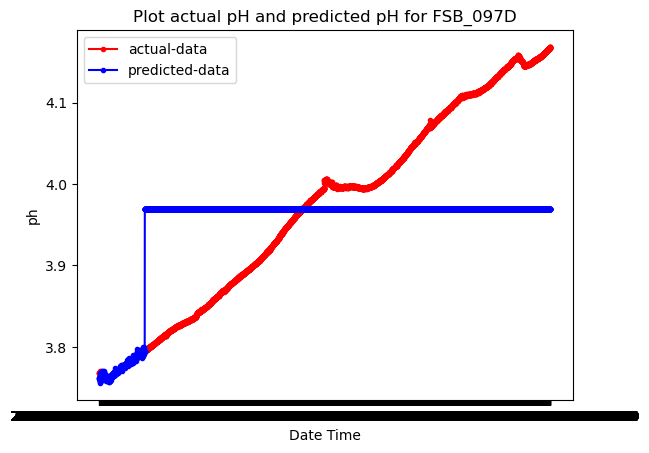

In [594]:
plt.figure(figsize=(10, 5))
for index in index_name.values():
    plt.plot(datetime, df[index], marker='.', color="red", label="actual-data")
    plt.plot(datetime, predicted_df[index], marker='.', color="blue", label = "predicted-data")


    plt.xlabel('Date Time')
    plt.ylabel('ph')
    plt.title(f'Plot actual pH and predicted pH for {index}')
    plt.legend()
    plt.show()